# This notebook handles missing values, and removes outliers.

### Scraping data from https://www.truecar.com/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vizi import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('../data/true_car_9720.csv',dtype={'vehicle_carfax_report_available':'object',
                                     'vehicle_multilocation':'object',
                                     'vehicle_price_dropped':'object'})

/Users/school/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning:

Columns (26,50) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.shape

(174954, 105)

### Found 15,457 duplicates.

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(159497, 105)

In [6]:
159497 - 174954

-15457

In [7]:
df.head(2)

,vehicle_body_style_slug,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_make_id,vehicle_make_slug,vehicle_make,vehicle_model_id,vehicle_model_slug,vehicle_model,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_style_slug,vehicle_style,vehicle_transmission,vehicle_trim_slug,vehicle_trim,vehicle_trim_id,vehicle_year,vehicle_chrome_trim_id,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_list_price,vehicle_member_discount,vehicle_mileage,vehicle_new_or_used,vehicle_stock_number,vehicle_vin,vehicle_truecar_make_id,vehicle_truecar_model_id,vehicle_doors,vehicle_newly_listed,vehicle_days_in_inventory,vehicle_make_logos,vehicle_provider_name,vehicle_request_price,vehicle_manufacturer_options,vehicle_bed_length,vehicle_cab_type,vehicle_roof_height,vehicle_multilocation,vehicle_location,vehicle_price_dropped,vehicle_certified_pre_owned,vehicle_sponsored,vehicle_image,vehicle_images,dealership_id,dealership_name,dealership_links_website_link,dealership_location_address1,dealership_location_address2,dealership_location_postal_code,dealership_location_lat,dealership_location_lng,dealership_location_city,dealership_location_state,dealership_location_distance,pricing_flags_show_list_price_label_pre_lead,pricing_flags_discount_message_pre_lead,pricing_flags_show_list_price_post_lead,pricing_flags_cert_title,pricing_flags_member_price_label_post_lead,pricing_flags_show_discount_post_lead,pricing_flags_description,pricing_flags_show_discount_pre_lead,pricing_flags_discount_label_pre_lead,pricing_list_price,pricing_member_discount,pricing_member_price,pricing_total_fees,pricing_other_fees_total,pricing_dealer_installed_options_total,pricing_total_price,pricing_transparency_pledge,pricing_list_price_includes_doc_fee,pricing_dealer_installed_options,pricing_other_fees,pricing_documentation_fee,pricing_tax_rate,pricing_tax_amount,pricing_total_taxed_price,price_curve_great,price_curve_good,price_curve_min,price_curve_max,price_curve_avg,price_curve_exceptional,price_curve_market_difference,price_curve_market_difference_display,price_curve_market_difference_percent,price_curve_market_difference_percent_display,price_curve_rating,price_curve_callout,vehicle_member_price,price_curve_callout_label,price_curve_callout_quality,price_curve_callout_quality_index
0,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,NaN,2020,405609.0,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,10742.0,0.0,598,USED,19C712,KL8CB6SA2LC408625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,False,"Richardson, TX",False,NaN,NaN,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,3185,Reliable Chevrolet TX,http://www.reliablechev.com/,800 N Central Expressway,NaN,75080,32.94195,-96.74401,Richardson,TX,NaN,False,NaN,False,Offer,Dealer Price,False,no_discounts,False,NaN,10742.0,NaN,10742.0,0,0,0,10742.0,NaN,NaN,[],[],NaN,NaN,NaN,NaN,11775.51,12503.89,8497.79,15781.61,12139.7,10925.73,0.0,0.0,0.0,0.0,EXCEPTIONAL_PRICE,NaN,NaN,NaN,NaN,NaN
1,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,NaN,2020,405609.0,True,no,Tan,E1D8D1,Toasted Marshmallow,Jet Black/Jet Black,10991.0,0.0,1004,USED,19C707,KL8CB6SA2LC408396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,False,"Richardson, TX",False,NaN,NaN,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,3185,Reliable Chevrolet TX,http://www.reliablechev.com/,800 N Central Expressway,NaN,75080,32.94195,-96.74401,Richardson,TX,NaN,False,NaN,False,Offer,Dealer Price,False,no_discounts,False,NaN,10991.0,NaN,10991.0,0,0,0,10991.0,NaN,NaN,[],[],NaN,NaN,NaN,NaN,11181.97,11873.64,806

In [8]:
df_vehicle = df.loc[:,[col for col in df.columns.values if col.startswith('vehicle') or col.startswith('dealer')]]

In [9]:
df_vehicle.head(2)

,vehicle_body_style_slug,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_make_id,vehicle_make_slug,vehicle_make,vehicle_model_id,vehicle_model_slug,vehicle_model,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_style_slug,vehicle_style,vehicle_transmission,vehicle_trim_slug,vehicle_trim,vehicle_trim_id,vehicle_year,vehicle_chrome_trim_id,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_list_price,vehicle_member_discount,vehicle_mileage,vehicle_new_or_used,vehicle_stock_number,vehicle_vin,vehicle_truecar_make_id,vehicle_truecar_model_id,vehicle_doors,vehicle_newly_listed,vehicle_days_in_inventory,vehicle_make_logos,vehicle_provider_name,vehicle_request_price,vehicle_manufacturer_options,vehicle_bed_length,vehicle_cab_type,vehicle_roof_height,vehicle_multilocation,vehicle_location,vehicle_price_dropped,vehicle_certified_pre_owned,vehicle_sponsored,vehicle_image,vehicle_images,dealership_id,dealership_name,dealership_links_website_link,dealership_location_address1,dealership_location_address2,dealership_location_postal_code,dealership_location_lat,dealership_location_lng,dealership_location_city,dealership_location_state,dealership_location_distance,vehicle_member_price
0,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,NaN,2020,405609.0,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,10742.0,0.0,598,USED,19C712,KL8CB6SA2LC408625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,False,"Richardson, TX",False,NaN,NaN,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,3185,Reliable Chevrolet TX,http://www.reliablechev.com/,800 N Central Expressway,NaN,75080,32.94195,-96.74401,Richardson,TX,NaN,NaN
1,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,NaN,2020,405609.0,True,no,Tan,E1D8D1,Toasted Marshmallow,Jet Black/Jet Black,10991.0,0.0,1004,USED,19C707,KL8CB6SA2LC408396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,False,"Richardson, TX",False,NaN,NaN,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,3185,Reliable Chevrolet TX,http://www.reliablechev.com/,800 N Central Expressway,NaN,75080,32.94195,-96.74401,Richardson,TX,NaN,NaN


### Check NA values

In [10]:
df_na = check_missing(df_vehicle,title_="features missing percentage",y_axis='percentage')

In [11]:
#check_missing(df_vehicle,do_plot=True,title_="features missing percentage",y_axis='percentage',height=700,weight=1000)

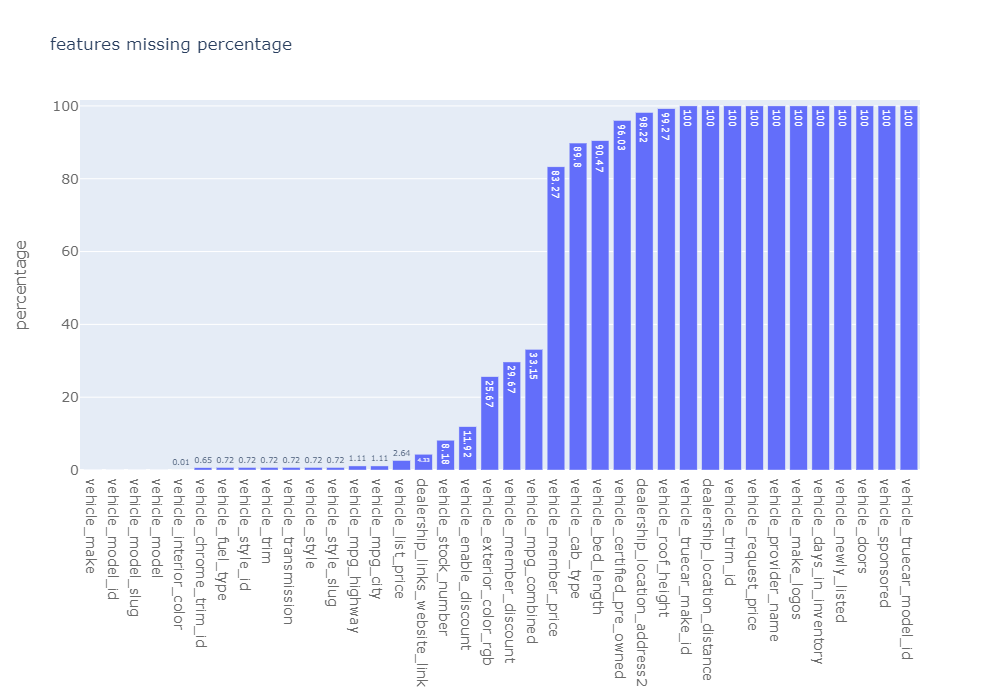

In [12]:
from IPython.display import Image
Image(filename='na_plot.png') 

### Drop missing percentage greater than 50%

In [13]:
column_need = df_na.drop(index = df_na[df_na.percent>50].index.values).features.values

In [14]:
df_need = df.loc[:,df.columns[df.columns.isin(column_need)].values]

In [15]:
df_need.shape

(159497, 49)

### drop other duplicate/useless  features
- some features are image links.
- some features are duplicates of other columns.
- some features has no meanings.

In [16]:
df_need.head(2)

,vehicle_body_style_slug,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_make_id,vehicle_make_slug,vehicle_make,vehicle_model_id,vehicle_model_slug,vehicle_model,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_style_slug,vehicle_style,vehicle_transmission,vehicle_trim_slug,vehicle_trim,vehicle_year,vehicle_chrome_trim_id,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_list_price,vehicle_member_discount,vehicle_mileage,vehicle_new_or_used,vehicle_stock_number,vehicle_vin,vehicle_manufacturer_options,vehicle_multilocation,vehicle_location,vehicle_price_dropped,vehicle_image,vehicle_images,dealership_id,dealership_name,dealership_links_website_link,dealership_location_address1,dealership_location_postal_code,dealership_location_lat,dealership_location_lng,dealership_location_city,dealership_location_state
0,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,2020,405609.0,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,10742.0,0.0,598,USED,19C712,KL8CB6SA2LC408625,[],False,"Richardson, TX",False,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,3185,Reliable Chevrolet TX,http://www.reliablechev.com/,800 N Central Expressway,75080,32.94195,-96.74401,Richardson,TX
1,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,2020,405609.0,True,no,Tan,E1D8D1,Toasted Marshmallow,Jet Black/Jet Black,10991.0,0.0,1004,USED,19C707,KL8CB6SA2LC408396,[],False,"Richardson, TX",False,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,3185,Reliable Chevrolet TX,http://www.reliablechev.com/,800 N Central Expressway,75080,32.94195,-96.74401,Richardson,TX


In [17]:
df_need.drop(['vehicle_image',
'vehicle_images',
'vehicle_manufacturer_options',
"vehicle_body_style",
"vehicle_make",
"vehicle_model",
"vehicle_style",
"vehicle_trim",
"vehicle_stock_number",
"vehicle_vin",
"dealership_links_website_link",
"dealership_location_address1"
],axis =1 , inplace = True)

### Check the remaining missing values
###  The missing percentage of missing values are trivial except 
- vehicle_enable_discount	12.00%
- vehicle_exterior_color_rgb	24.68%
- vehicle_member_discount	29.19%
- vehicle_mpg_combined	31.70%

### Drop NA list price first

In [18]:
na_price_idx = df_need[df_need.vehicle_list_price.isnull()].index.values
df_need.drop(index =na_price_idx, inplace = True)
df_need.reset_index(drop = True,inplace=True)

In [19]:
miss_columns = df_need.columns[df_need.isnull().any()].values

In [20]:
check_missing(df_need[miss_columns],title_="features missing percentage",y_axis='percentage')

,features,percent
0,vehicle_exterior_color,0.00
1,vehicle_interior_color,0.01
2,vehicle_chrome_trim_id,0.66
3,vehicle_fuel_type,0.73
4,vehicle_style_id,0.73
5,vehicle_style_slug,0.73
6,vehicle_transmission,0.73
7,vehicle_mpg_city,1.13
8,vehicle_mpg_highway,1.13
9,vehicle_enable_discount,12.00


### Fill "vehicle_enable_discount" with "no"

In [21]:
df_need.vehicle_enable_discount.value_counts()

yes_all_tc    62133
no            52978
yes_member    21536
Name: vehicle_enable_discount, dtype: int64

In [22]:
df_need.vehicle_enable_discount.fillna('no',inplace = True)

### Fill  "vehicle_member_discount" with 0.0

In [23]:
df_need.vehicle_member_discount.fillna(0.0,inplace=True)

### Fill "vehicle_mpg_combined" by weighting the City value by 55% and the Highway value by 45% based on combined fuel economy calculation.

In [24]:
na_mpgcomb_idx = df_need[(df_need.vehicle_mpg_combined.isnull()) &
                        (~df_need.vehicle_mpg_city.isnull()) &
                        (~df_need.vehicle_mpg_highway.isnull())].index.values

In [25]:
df_need.loc[na_mpgcomb_idx,'vehicle_mpg_combined'] = (df_need.loc[na_mpgcomb_idx,'vehicle_mpg_city'] * 0.55 + df_need.loc[na_mpgcomb_idx,'vehicle_mpg_highway'] * 0.45).values

### Fill "vehicle_fuel_type" with "Gas"

In [26]:
df_need.vehicle_fuel_type.value_counts()

Gas         143874
Diesel        5538
Hybrid        3475
Electric       799
Plug-In        420
CNG             23
Hydrogen        16
Name: vehicle_fuel_type, dtype: int64

In [27]:
df_need.vehicle_fuel_type.fillna('Gas',inplace = True)

### Fill "vehicle_transmission" with "Automatic"

In [28]:
df_need.vehicle_transmission.value_counts()

Automatic    142894
Manual        11251
Name: vehicle_transmission, dtype: int64

In [29]:
df_need.vehicle_transmission.fillna('Automatic',inplace = True)

### Fill "vehicle_exterior_color_rgb" with "000000"

In [31]:
#df_need.vehicle_exterior_color_rgb.value_counts()

In [32]:
df_need.vehicle_exterior_color_rgb.fillna('000000',inplace = True)

### Check missing after fill

In [33]:
check_missing(df_need[miss_columns],title_="features missing percentage",y_axis='percentage')

,features,percent
0,vehicle_fuel_type,0.00
1,vehicle_transmission,0.00
2,vehicle_enable_discount,0.00
3,vehicle_exterior_color_rgb,0.00
4,vehicle_exterior_color,0.00
5,vehicle_member_discount,0.00
6,vehicle_interior_color,0.01
7,vehicle_chrome_trim_id,0.66
8,vehicle_style_id,0.73
9,vehicle_style_slug,0.73


### Drop the rest of NA values

In [34]:
df_need.dropna(inplace=True)
df_need.reset_index(drop = True, inplace=True)

### No missing now!

In [35]:
df_need.isnull().sum()

vehicle_body_style_slug            0
vehicle_drive_train                0
vehicle_engine                     0
vehicle_fuel_type                  0
vehicle_make_id                    0
vehicle_make_slug                  0
vehicle_model_id                   0
vehicle_model_slug                 0
vehicle_mpg_city                   0
vehicle_mpg_combined               0
vehicle_mpg_highway                0
vehicle_style_id                   0
vehicle_style_slug                 0
vehicle_transmission               0
vehicle_trim_slug                  0
vehicle_year                       0
vehicle_chrome_trim_id             0
vehicle_carfax_report_available    0
vehicle_enable_discount            0
vehicle_exterior_color_generic     0
vehicle_exterior_color_rgb         0
vehicle_exterior_color             0
vehicle_interior_color             0
vehicle_list_price                 0
vehicle_member_discount            0
vehicle_mileage                    0
vehicle_new_or_used                0
v

In [36]:
new_col_name = [col.replace("_slug","") for col in df_need.columns.values]

In [37]:
df_need.rename(columns=dict(zip(df_need.columns.values,new_col_name)),inplace=True)

In [38]:
df_need.shape

(153510, 37)

## Check outliers

In [39]:
df_need.select_dtypes(exclude='object').describe()

,vehicle_make_id,vehicle_model_id,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_year,vehicle_chrome_trim_id,vehicle_list_price,vehicle_member_discount,vehicle_mileage,dealership_id,dealership_location_postal_code,dealership_location_lat,dealership_location_lng
count,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000
mean,33.801746,4490.276425,21.539822,24.248447,28.603225,37244.463351,2011.556146,316749.681115,12390.828845,66.238323,84672.781825,58258.296580,53965.915354,36.668474,-93.330776
std,16.159310,2582.735571,10.490108,10.091848,10.111081,17135.517469,5.243703,90606.792712,10826.932624,115.267328,55493.100502,50560.893903,29954.499668,5.342813,16.709261
min,1.000000,2.000000,0.000000,0.000000,0.000000,21.000000,1997.000000,37.000000,1500.000000,-250.000000,5.000000,250.000000,659.000000,18.487014,-158.030670
25%,21.000000,2200.000000,17.000000,19.600000,24.000000,23806.000000,2008.000000,289083.000000,6999.000000,0.000000,39468.000000,16918.500000,29483.000000,33.204080,-105.106750
50%,35.000000,4553.000000,21.000000,24.000000,28.000000,37196.000000,2012.000000,333843.000000,10495.000000,0.000000,80623.500000,40817.000000,50325.000000,36.893010,-87.825350
75%,51.000000,6910.000000,25.000000,29.000000,35.000000,52064.000000,2016.000000,378771.000000,13995.000000,100.000000,119989.750000,87814.000000,80905.000000,40.624615,-80.204500
max,61.000000,8818.000000,137.000000,124.000000,111.000000,68203.000000,2020.000000,411659.000000,499999.000000,1500.000000,489839.000000,180283.000000,99747.000000,70.129804,-66.813172


### vehicle_mpg_city

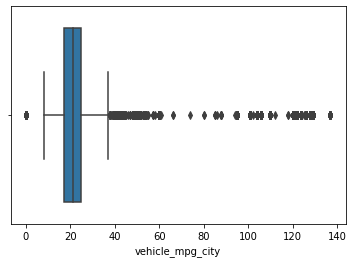

In [40]:
sns.boxplot(df_need.vehicle_mpg_city)
plt.show()

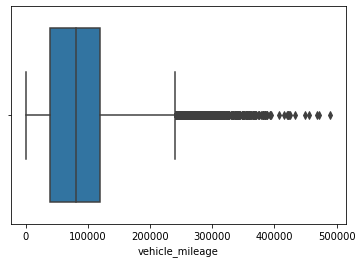

In [41]:
sns.boxplot(df_need.vehicle_mileage)
plt.show()


###  vehicle_list_price



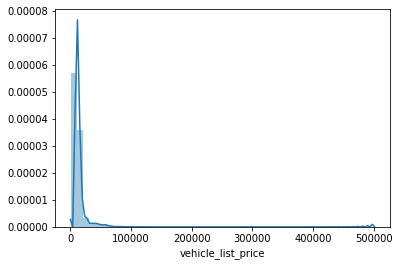

In [42]:
sns.distplot(df_need.vehicle_list_price)
plt.show()

### build a cheap used car model with some constrain
- mpg city between 0 to 38.
- mileage less or equal to 234500
- price less than 22500

In [43]:
df_new = df_need[(df_need.vehicle_mpg_city>0)&(df_need.vehicle_mpg_city<38)]
df_new = df_new[df_new.vehicle_mileage<=234500]
df_new = df_new[df_new.vehicle_list_price<=22500]

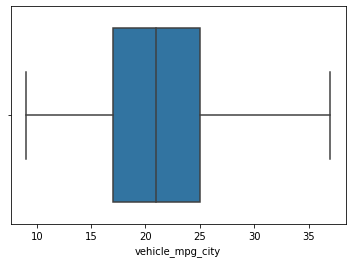

In [44]:
sns.boxplot(df_new.vehicle_mpg_city)
plt.show()

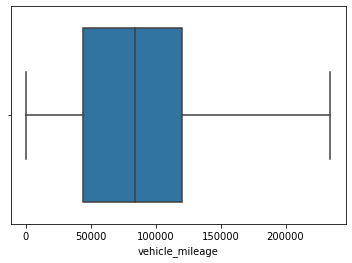

In [45]:
sns.boxplot(df_new.vehicle_mileage)
plt.show()

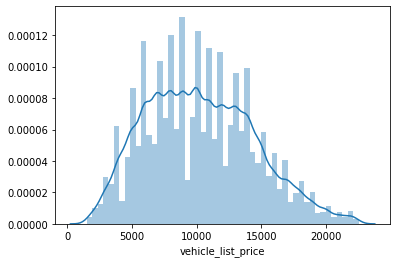

In [46]:
sns.distplot(df_new.vehicle_list_price)
plt.show()

### Found 17 negative vehicle_member_discount
- Replace them with 0

In [47]:
df_new[df_new.vehicle_member_discount<0].shape[0]

17

In [48]:
neg_md_idx = df_new[df_new.vehicle_member_discount<0].index.values

In [49]:
df_new.loc[neg_md_idx,'vehicle_member_discount'] = 0

### Write out processed csv file

In [50]:
df_new.shape

(134451, 37)

In [51]:
df_new.to_csv('../data/processed.csv',index= False)